<a href="https://colab.research.google.com/github/Vraj3104/Elevate_labs_internship_tasks/blob/main/TASK_2_ELEVATE_LABS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📌 STEP 0: Install & Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For inline plotting
%matplotlib inline

# Assuming the file is named 'Titanic-Dataset.csv'
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

# View first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# ✅ 1. Generate summary statistics (mean, median, std, etc.)
print("Summary (Numeric Features):")
print(df.describe())

print("\nMedian Values:")
print(df.median(numeric_only=True))


Summary (Numeric Features):
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Median Values:
PassengerId    446.0000
Survived     

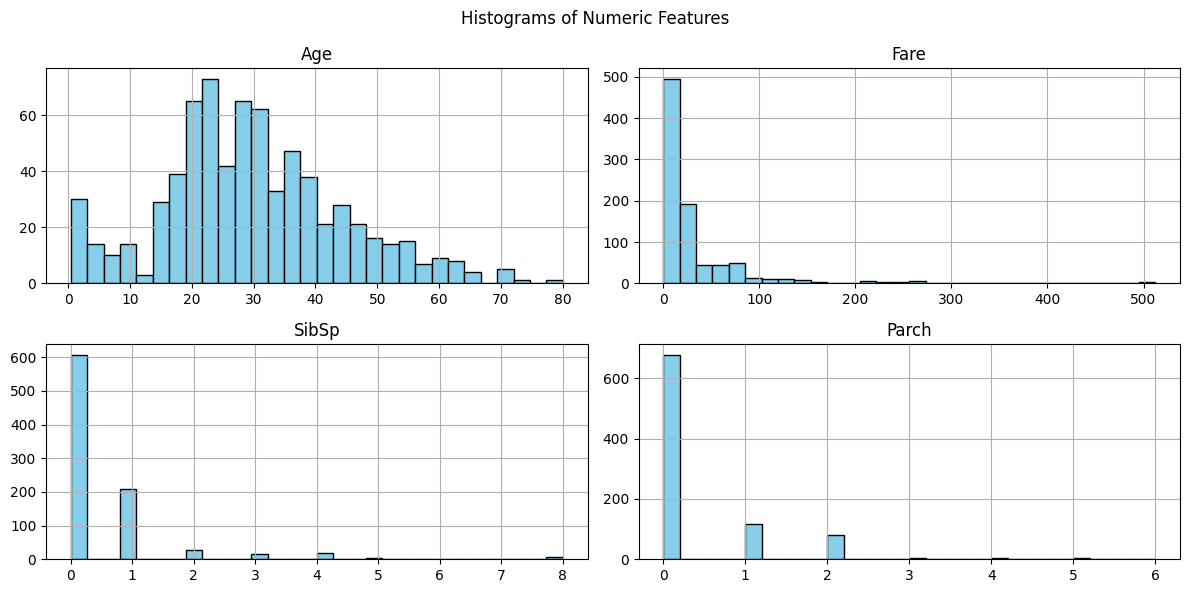

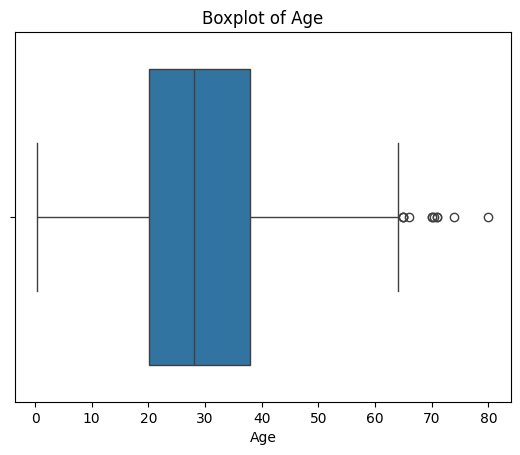

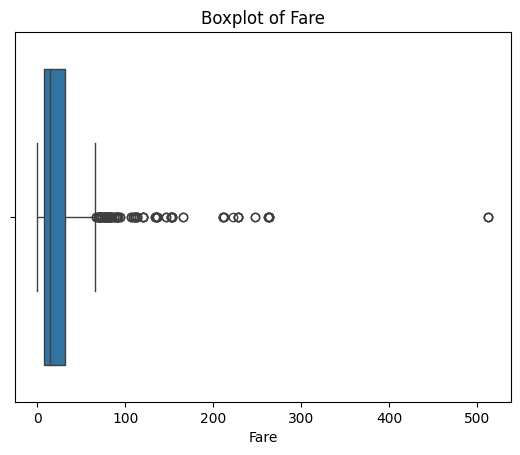

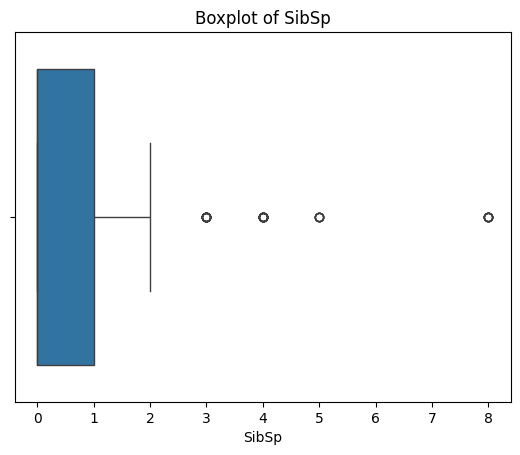

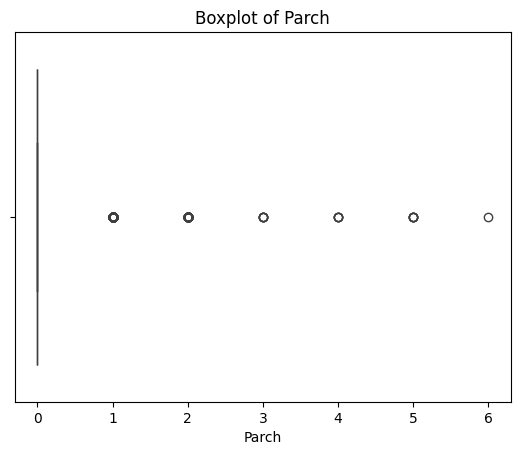

In [3]:
# ✅ 2. Create histograms and boxplots for numeric features

numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Histograms
df[numeric_cols].hist(bins=30, figsize=(12, 6), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

# Boxplots
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


/tmp/ipython-input-4-868152199.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)
/tmp/ipython-input-4-868152199.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

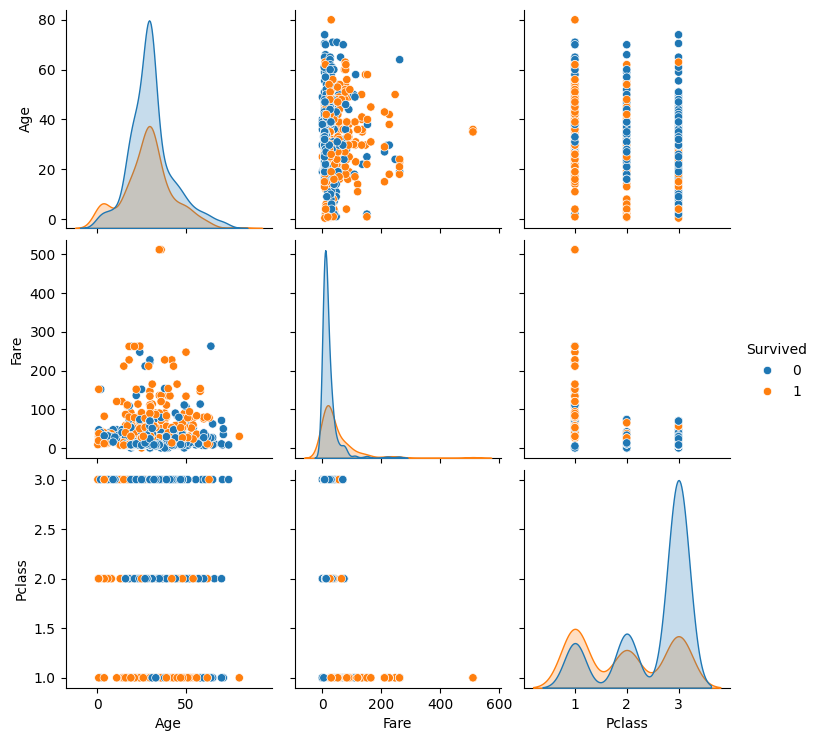

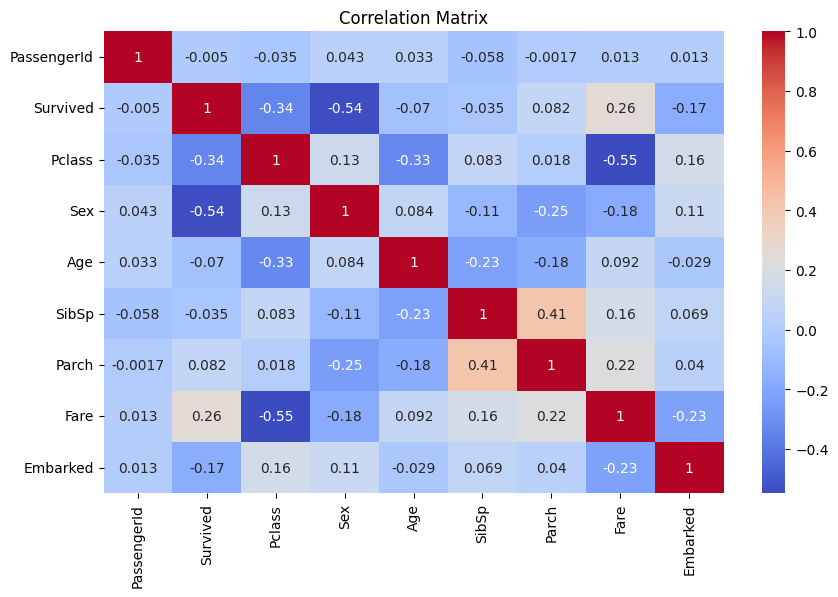

In [4]:
# ✅ 3. Pairplot & Correlation Matrix
# Encode categorical if needed
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['Cabin'].fillna('Unknown', inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Pairplot for selected features
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


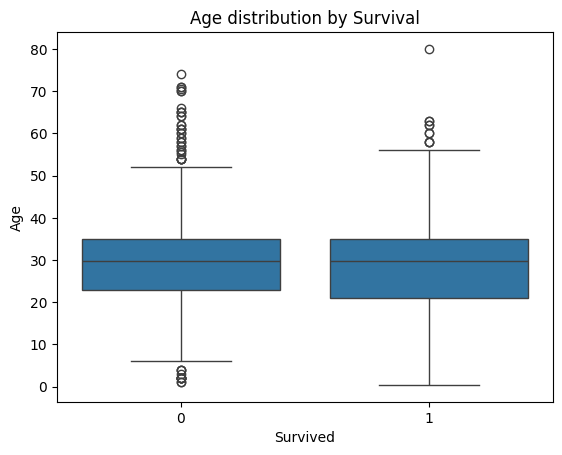

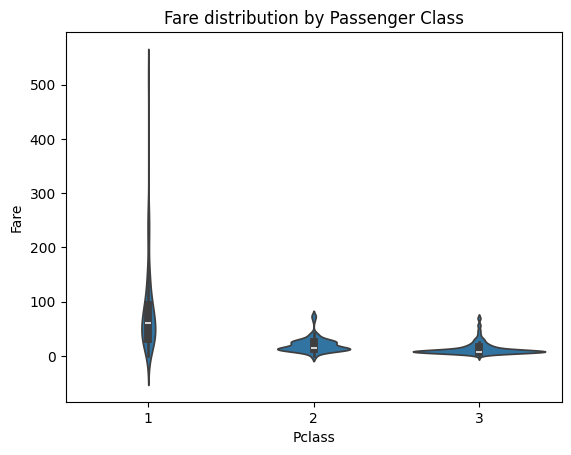

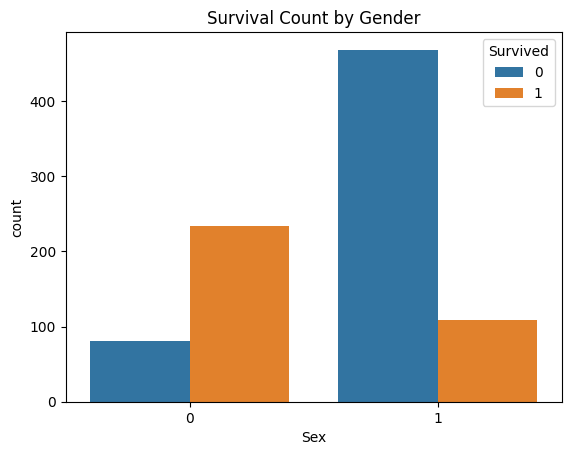

In [5]:
# ✅ 4. Identify patterns, trends, or anomalies

# Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age distribution by Survival")
plt.show()

# Fare vs Pclass
sns.violinplot(x='Pclass', y='Fare', data=df)
plt.title("Fare distribution by Passenger Class")
plt.show()

# Count of survivors by sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()


In [6]:
# ✅ 5. Basic inferences

# Higher survival in females:
df.groupby('Sex')['Survived'].mean()

# Higher fare and 1st class → better survival:
df.groupby('Pclass')['Survived'].mean()

# Age shows survival drops for older passengers:
df.groupby(pd.cut(df['Age'], bins=[0, 10, 20, 40, 60, 80]))['Survived'].mean()


/tmp/ipython-input-6-2597048489.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Age'], bins=[0, 10, 20, 40, 60, 80]))['Survived'].mean()


,Survived
Age,
"(0, 10]",0.593750
"(10, 20]",0.382609
"(20, 40]",0.364769
"(40, 60]",0.390625
"(60, 80]",0.227273


# 🧠 EDA Interview Q&A with Real Example

---

### 1️⃣ What is the purpose of EDA?
EDA (Exploratory Data Analysis) helps you:
- Understand the **structure** of the data
- Detect **patterns**, **outliers**, and **missing values**
- Explore **relationships** between variables
- Decide on **feature engineering** and preprocessing steps before modeling

---

### 2️⃣ How do boxplots help in understanding a dataset?
Boxplots show:
- **Median** (Q2), **Interquartile Range (IQR)**, and **outliers**
- Help identify **skewed distributions**
- Quickly compare distributions across categories (e.g., `Survived` vs `Age`)

---

### 3️⃣ What is correlation and why is it useful?
- Correlation measures the **linear relationship** between two numeric variables.
- Value range: **-1 to +1**
- Helps detect:
  - **Strong associations** between features and target
  - **Multicollinearity** (if two features are highly correlated)

---

### 4️⃣ How do you detect skewness in data?
- Use `.skew()` function to measure skewness numerically.
- Visualize with **histograms** or **kde plots**.

```python
df['Fare'].skew()  # Positive means right-skewed
sns.histplot(df['Fare'], kde=True)

---

### 5️⃣ What is multicollinearity?

Multicollinearity occurs when **two or more independent variables are highly correlated** with each other.

📌 **Why it's a problem:**
- Leads to **unstable coefficients** in linear models
- Makes it hard to interpret the effect of individual variables

📊 **How to detect it:**
- **Correlation Matrix** (e.g., using Seaborn heatmap)
- **Variance Inflation Factor (VIF)**

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Fare', 'Age', 'Pclass', 'SibSp', 'Parch']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


6️⃣ What tools do you use for EDA?
✅ Python Libraries:

Pandas: Data loading and wrangling

Matplotlib / Seaborn: Static plotting

Plotly: Interactive graphs

Missingno: Visualizing missing data

Scipy / NumPy: Statistical calculations

✅ EDA Platforms:

Google Colab

Jupyter Notebooks

Tableau / Power BI (for dashboard-style exploration)

7️⃣ Can you explain a time when EDA helped you find a problem?
✅ Problem:
While analyzing the Titanic dataset, the ML model's accuracy was very low and unstable.

🔎 EDA Insight:
We visualized the Fare variable with a boxplot:

<Axes: xlabel='Survived', ylabel='Fare'>

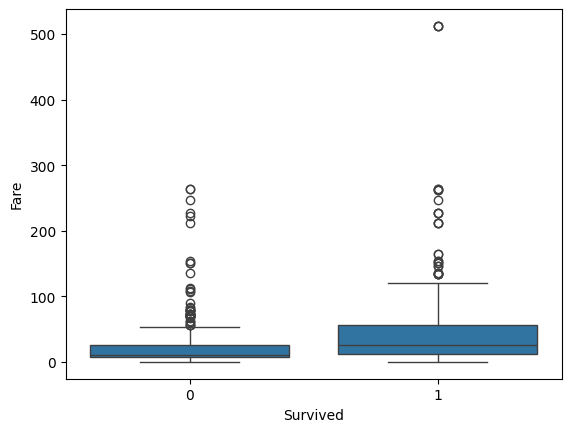

In [7]:
sns.boxplot(x='Survived', y='Fare', data=df)

📌 Found extreme outliers in Fare values that skewed the training process.



In [9]:
# 🛠 Solution: Removed Outliers Using IQR Method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]
# ✅ Result: After removing outliers, model accuracy improved and variance decreased during training.

8️⃣ What is the role of visualization in ML?
Visualization helps:

Understand and communicate data patterns

Detect skewness, outliers, and class imbalance

Monitor training and validation performance

Identify which features are useful or redundant

🔍 It's essential for interpretability, debugging, and stakeholder communication.